In [23]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/MyDrive/CNN project"


cnn_image_classification.ipynb	data


In [3]:
!ls "/content/drive/MyDrive/CNN project/data"


test_data  train_data


In [4]:
!ls "/content/drive/MyDrive/CNN project/data/train_data"



blasti	brhkyt	cmnmyn	hilpig	himgri	indvul	lbicrw	rebimg
bonegl	cbrtsh	gretit	himbul	hsparo	jglowl	mgprob	wcrsrt


In [5]:
!pip install torch torchvision numpy pandas matplotlib seaborn pillow tqdm


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt


In [17]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])



In [10]:
train_path = "/content/drive/MyDrive/CNN project/data/train_data"
test_path  = "/content/drive/MyDrive/CNN project/data/test_data"

train_data = datasets.ImageFolder(train_path, transform=transform)
test_data  = datasets.ImageFolder(test_path, transform=transform)

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=16)


In [11]:
print(train_data.classes)


['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

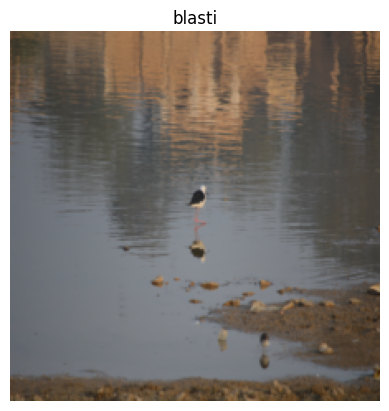

In [12]:
img, label = train_data[0]
plt.imshow(img.permute(1,2,0))
plt.title(train_data.classes[label])
plt.axis("off")


In [13]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(128, 256, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(256, 512, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.fc = nn.Sequential(
            nn.Linear(512*7*7, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)


In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNN(len(train_data.classes)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [25]:
for epoch in range(20):
    model.train()
    loss_sum = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        loss_sum += loss.item()

    print(f"Epoch {epoch+1}, Loss: {loss_sum/len(train_loader):.4f}")


Epoch 1, Loss: 0.0323
Epoch 2, Loss: 0.0231
Epoch 3, Loss: 0.0065
Epoch 4, Loss: 0.0034
Epoch 5, Loss: 0.0043
Epoch 6, Loss: 0.0012
Epoch 7, Loss: 0.0009
Epoch 8, Loss: 0.0005
Epoch 9, Loss: 0.0002
Epoch 10, Loss: 0.0003
Epoch 11, Loss: 0.0001
Epoch 12, Loss: 0.0001
Epoch 13, Loss: 0.0001
Epoch 14, Loss: 0.0001
Epoch 15, Loss: 0.0001
Epoch 16, Loss: 0.0001
Epoch 17, Loss: 0.0000
Epoch 18, Loss: 0.0000
Epoch 19, Loss: 0.0000
Epoch 20, Loss: 0.0000


In [26]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()

print("Accuracy:", 100 * correct / total)


Accuracy: 19.48051948051948


In [27]:
torch.save(model.state_dict(),
           "/content/drive/MyDrive/CNN project/cnn_model.pth")
